Basic method to transfer data from javascript to python adapted from [A little exchange - python variable -> javascript variable -> python variable](https://michhar.github.io/javascript-and-python-have-a-party/).

Here is a jupyter notebook that implements the method in this blog post: [Jupyter_and_JavaScript.ipynb](https://github.com/michhar/python-jupyter-notebooks/blob/master/primers/Jupyter_and_JavaScript.ipynb).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
%%javascript

// Helper functions
const range = (start, stop, step) => Array.from({ length: (stop - start) / step + 1}, (_, i) => start + (i * step));
const fill_zeros = (start, stop, step) => Array.from({ length: (stop - start) / step + 1}, (_, i) => 0);

var layer_info = [
    [10, 300],
    [10, 300],
    [10, 300],
    [10, 300],
    [10, 300],
    [10, 300],
    [10, 300],
    [10, 300],
    [10, 300],
    [10, 300],
]

var z_min = 0;
var z_max = 100;
var z_step = 0.25;

var h_a = 10;

var z_values = range(z_min, z_max, z_step);
var dose = fill_zeros(z_min, z_max, z_step);


var z_current = 0;
for (var i=0; i<layer_info.length; i++) {
    z_current += layer_info[i][0]
    // console.log(layer_info[i]);
    var j = 0;
    while (z_current >= z_values[j]){
        var delta_z = z_current - z_values[j];
        dose[j] += layer_info[i][1] * Math.exp(-delta_z/h_a)
        // console.log(i, j, z_current, z_values[j], dose[j]);
        j++;
    }
}

var data = {
    'z': z_values,
    'dose': dose
}

var data_json = JSON.stringify(data);

IPython.notebook.kernel.execute('data_json=' + data_json);


<IPython.core.display.Javascript object>

In [13]:
# data_json

In [14]:
# type(data_json)

Text(0, 0.5, 'Dose')

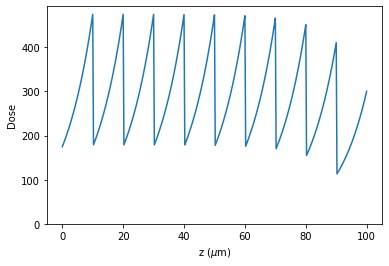

In [16]:
fix, ax = plt.subplots()
ax.plot(data_json['z'], data_json['dose'])
ax.set_ylim(0,)
ax.set_xlabel("z ($\mu$m)")
ax.set_ylabel("Dose")